# LAB ASSESMENT - PADMAJA 19BAI1107


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics

In C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
df = pd.read_csv('Lab-Data-RegressionR3.csv')

In [3]:
df.shape

(20, 18)

In [4]:
df.tail()

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,R3
15,96,0.01,0.0529,0.935,0.000539,0.01,0.0529,0.935,0.000539,0.01,0.0682,0.9513,0.000817,0.01,0.0682,0.9513,0.000817,0.467
16,97,0.01,0.0529,0.935,0.000539,0.01,0.0575,0.947,0.000694,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.487
17,98,0.01,0.0529,0.935,0.000539,0.01,0.0575,0.947,0.000694,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,0.340
18,99,0.01,0.0529,0.935,0.000539,0.01,0.0575,0.947,0.000694,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,0.493
19,100,0.01,0.0529,0.935,0.000539,0.01,0.0575,0.947,0.000694,0.01,0.0483,0.8728,0.000435,0.01,0.0682,0.9513,0.000817,0.347


In [5]:
df.head()

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,R3
0,81,0.01,0.0529,0.935,0.000539,0.01,0.0529,0.935,0.000539,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.487
1,82,0.01,0.0529,0.935,0.000539,0.01,0.0529,0.935,0.000539,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,0.440
2,83,0.01,0.0529,0.935,0.000539,0.01,0.0529,0.935,0.000539,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,0.387
3,84,0.01,0.0529,0.935,0.000539,0.01,0.0529,0.935,0.000539,0.01,0.0483,0.8728,0.000435,0.01,0.0682,0.9513,0.000817,0.407
4,85,0.01,0.0529,0.935,0.000539,0.01,0.0529,0.935,0.000539,0.01,0.0529,0.9350,0.000539,0.01,0.0483,0.8728,0.000435,0.340


In [10]:
df.drop(['Sample No'], inplace=True, axis=1)

### Min-Max Normalization

In [11]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df)
minmax_scaled_data = minmax_scaler.transform(df)
df_scaled = pd.DataFrame(minmax_scaled_data, columns=df.columns)

In [12]:
df_scaled

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,R3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.761658
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.231156,0.792357,0.272251,0.518135
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.462312,0.945223,0.678010,0.243523
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.347150
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231156,0.792357,0.272251,0.0,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231156,0.792357,0.272251,0.0,0.231156,0.792357,0.272251,1.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231156,0.792357,0.272251,0.0,0.462312,0.945223,0.678010,0.450777
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.231156,0.792357,0.272251,0.0,1.000000,1.000000,1.000000,0.554404
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462312,0.945223,0.678010,0.0,0.000000,0.000000,0.000000,0.792746
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462312,0.945223,0.678010,0.0,0.231156,0.792357,0.272251,0.621762


## CORRELATION 

In [20]:
x1 =df_scaled['P11']
x2 = df_scaled['P12']
x3 = df_scaled['P13']
x4 = df_scaled['P14']
x5 =df_scaled['P15']
x6 = df_scaled['P16']

In [21]:
print("Correlation between x1 and x2:",x1.corr(x2))
print("Correlation between x1 and x3:",x1.corr(x3))
print("Correlation between x2 and x3",x2.corr(x3))
print("Correlation between x1 and x4",x1.corr(x4))
print("Correlation between x2 and x4",x2.corr(x4))
print("Correlation between x3 and x4",x3.corr(x4))

Correlation between x1 and x2: 0.8872141990594729
Correlation between x1 and x3: nan
Correlation between x2 and x3 nan
Correlation between x1 and x4 5.975606929428917e-18
Correlation between x2 and x4 -5.6133058794472766e-18
Correlation between x3 and x4 nan


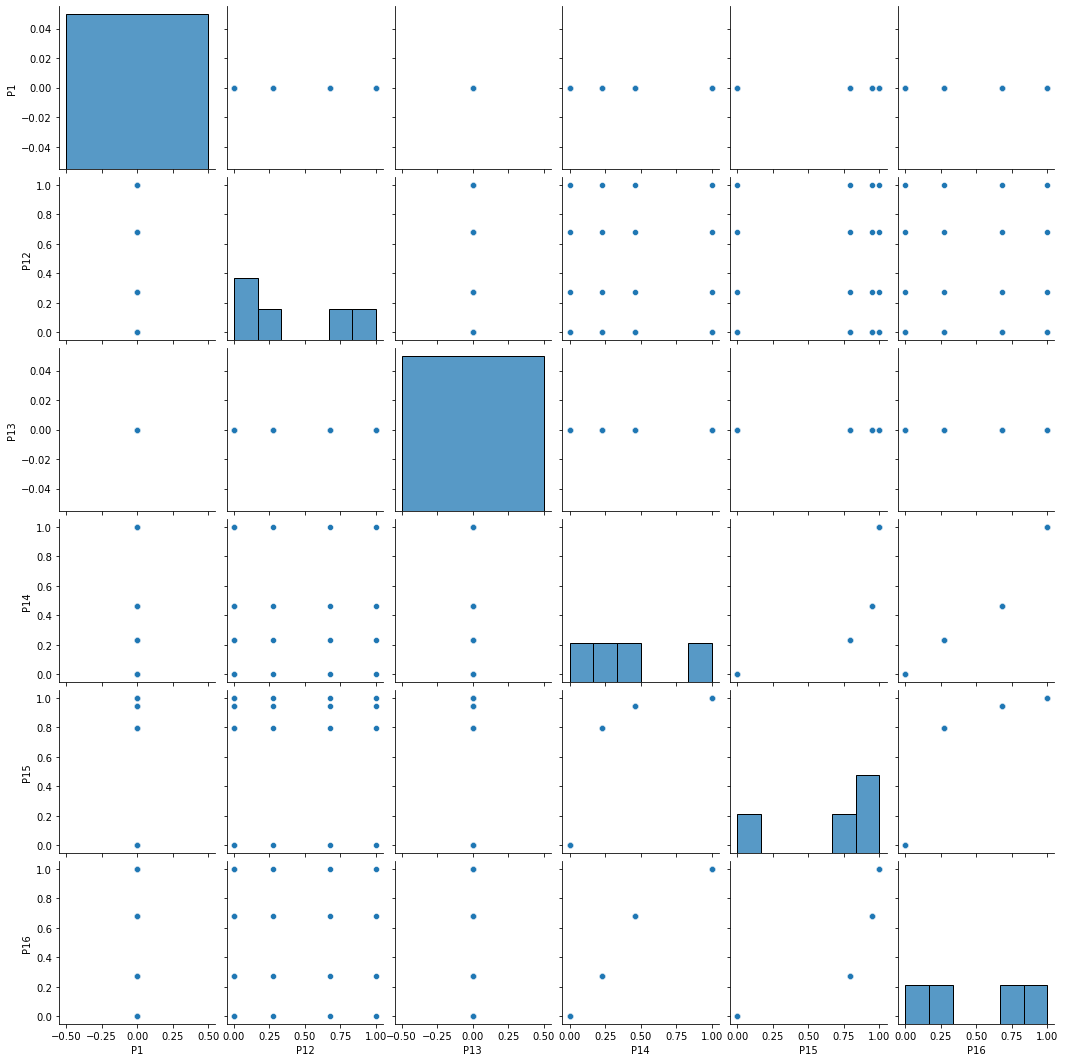

In [28]:
df_scatter = df_scaled[['P1','P12','P13','P14', 'P15', 'P16']]
sns.pairplot(df_scatter)

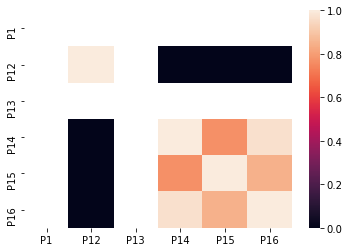

In [29]:
sns.heatmap(df_scatter.corr())

##  Regression Model Training

In [7]:
X = df[['P11', 'P12', 'P13', 'P14', 'P15','P16']]
Y = df['R3']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

## Declaring Function

In [16]:
def adjusted_r2(predictions):
    n = df.shape[0]
    p = X.shape[1]
    r2 = metrics.r2_score(y_test, predictions)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    return adjusted_r2

In [17]:
mylm = LinearRegression()
mylm.fit(X_train,y_train)

LinearRegression()

In [18]:
mylm.intercept_

0.4143123790706441

In [19]:
coeff_df = pd.DataFrame(mylm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
P11,-3.909004e-01
P12,1.217836e+02
P13,-8.100187e-13
P14,4.306840e+00
P15,3.869000e-01
P16,-4.900275e+02


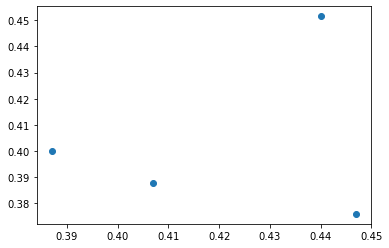

In [20]:
predictions = mylm.predict(X_test)
plt.scatter(y_test,predictions)

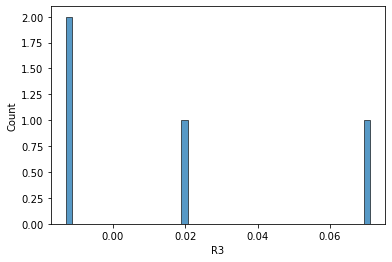

In [21]:
sns.histplot((y_test-predictions),bins=50);

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:', metrics.r2_score(y_test, predictions))
print('Adjusted R^2:', adjusted_r2(predictions))

MAE: 0.0288003907930693
MSE: 0.0014348286049877266
RMSE: 0.037879131523673115
R^2: -1.4046567172728217


NameError: name 'df_scaled' is not defined

## Ridge Regression

In [39]:
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01)

In [40]:
rr.intercept_

0.6159003424787616

In [41]:
coeff_df = pd.DataFrame(rr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
P11,-0.155731
P12,0.237828
P13,0.000000
P14,0.313713
P15,0.123999
P16,-0.814326


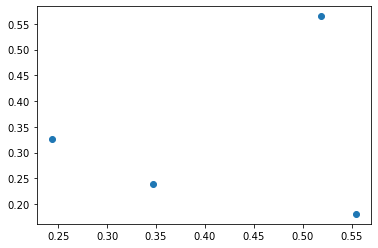

In [42]:
predictions_rr = rr.predict(X_test)
plt.scatter(y_test,predictions_rr)

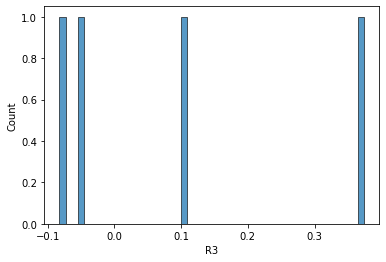

In [43]:
sns.histplot((y_test-predictions_rr),bins=50);

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_rr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rr)))
print('R^2:', metrics.r2_score(y_test, predictions_rr))
print('Adjusted R^2:', adjusted_r2(predictions_rr))

MAE: 0.15273875492502115
MSE: 0.040083117271142686
RMSE: 0.20020768534485056
R^2: -1.502241181913134
Adjusted R^2: -2.657121727411504


## Lasso Regression

In [45]:
lr = Lasso(alpha=0.01)
lr.fit(X_train,y_train)

Lasso(alpha=0.01)

In [46]:
lr.intercept_

0.6014446312793672

In [47]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
P11,0.000000
P12,0.018222
P13,0.000000
P14,-0.000000
P15,-0.000000
P16,-0.322062


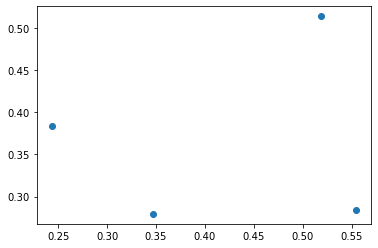

In [48]:
predictions_lr = lr.predict(X_test)
plt.scatter(y_test,predictions_lr)

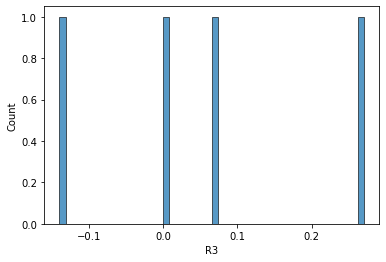

In [49]:
sns.histplot((y_test-predictions_lr),bins=50);

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))
print('R^2:', metrics.r2_score(y_test, predictions_lr))
print('Adjusted R^2:', adjusted_r2(predictions_lr))

MAE: 0.12184787281700958
MSE: 0.020402258494947725
RMSE: 0.142836474665779
R^2: 0.5334103237241419
Adjusted R^2: 0.5100808399103489


## Elastic Net Regression

In [63]:
enr = ElasticNet(alpha=0.01)
enr.fit(X_train,y_train)


ElasticNet(alpha=0.01)

In [64]:
enr.intercept_

0.5974994366209817

In [65]:
coeff_df = pd.DataFrame(enr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
P11,-0.000000
P12,0.052034
P13,0.000000
P14,-0.000000
P15,-0.000000
P16,-0.350210


# Inference 

In [52]:
inference = {
    'Regression': ['Linear', 'Ridge', 'Lasso'],
    'MAE': 
        [
            metrics.mean_absolute_error(y_test, predictions), 
            metrics.mean_absolute_error(y_test, predictions_rr),
            metrics.mean_absolute_error(y_test, predictions_lr), 
            
        ],
    'MSE':
        [
            metrics.mean_squared_error(y_test, predictions), 
            metrics.mean_squared_error(y_test, predictions_rr),
            metrics.mean_squared_error(y_test, predictions_lr), 
            
        ],
    'RMSE':
        [
            np.sqrt(metrics.mean_squared_error(y_test, predictions)), 
            np.sqrt(metrics.mean_squared_error(y_test, predictions_rr)),
            np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)), 
            
        ],
    'R2':
        [
            metrics.r2_score(y_test, predictions), 
            metrics.r2_score(y_test, predictions_rr),
            metrics.r2_score(y_test, predictions_lr), 
            
        ],
    'Adjusted R2':
        [
            adjusted_r2(predictions), 
            adjusted_r2(predictions_rr),
            adjusted_r2(predictions_lr), 
          
        ]
}

In [53]:
Inference_Stage1 = pd.DataFrame(inference)
print(Inference_Stage1)

  Regression       MAE       MSE      RMSE        R2  Adjusted R2
0     Linear  0.149225  0.038520  0.196265 -1.404657    -2.514498
1      Ridge  0.152739  0.040083  0.200208 -1.502241    -2.657122
2      Lasso  0.120440  0.024255  0.155741 -0.514168    -1.213015


## Conclusion

##### Since the R^2  is highest for Lasso in stage 1 and the errors are the least Lasso is the suitable model here.